In [1]:
reduce=function(data){
    differenze_mediane <- numeric(nrow(data))

# Calcola le differenze di mediana per ciascuna riga
for (i in 1:nrow(data)) {
  prima_riga <- data[i, ]
  DMSO <- prima_riga[1,]
  altri <- prima_riga[c(2,3)]
  mediana_DMSO <- median(as.numeric(DMSO))
  mediana_altri <- median(as.numeric(altri))
  differenza_mediana <- abs(mediana_altri-mediana_DMSO) 
  differenze_mediane[i] <- differenza_mediana
}

# Calcola la media e la deviazione standard delle differenze
media_differenze <- mean(differenze_mediane)
deviazione_standard_differenze <- sd(differenze_mediane)

# Imposta il numero di deviazioni standard sopra la media come soglia
numero_deviazioni_standard_soglia <- 1  # Cambia questo valore a seconda delle tue esigenze

# Calcola la soglia in base alla media e alla deviazione standard
soglia_differenza <- media_differenze + (numero_deviazioni_standard_soglia * deviazione_standard_differenze)

# Filtra i geni in base alla soglia di differenza
geni_filtrati <- risultati_differenze[risultati_differenze$Differenza_Mediana > soglia_differenza, ]

# Ordina il dataframe in base alla soglia di differenza
geni_ordinati <- geni_filtrati[order(geni_filtrati$Differenza_Mediana, decreasing = TRUE), ]
# Stampa i geni ordinati
data=data[geni_ordinati[,1],]
return(data)
    }

In [23]:
noExt=function(x){
return(tools::file_path_sans_ext(x))
}
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
rRider=function(x){
sapply(x,FUN=function(x){
strsplit(x,"-RIDER")[[1]][1]
})
}
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
#LOAD LIBRARIES 
library(gtools);
library("GenomicRanges");
options(warn=-1)
library(ggplot2)
get_entry_size <- function(entry) {
  return(entry$ChrEnd - entry$ChrStart)
}


In [2]:
library(ggplot2)
library(GenomicRanges)
library("stats")
library(scales)
library(dplyr)  # Carica il pacchetto dplyr
bnoExt=function(x){
return(basename(tools::file_path_sans_ext(x)))
}
fNumber=function(x){
sapply(x,FUN=function(x){
strsplit(x,"__")[[1]][2]
})
}
# Definisci colori e tipi di linee
color_mapping <- c(
  "DMSO" = "blue",
  "Taze" = "red",
  "Vale" = "orange"
)

linetype_mapping <- c(
  "DMSO" = "solid",
  "Taze" = "solid",
  "Vale" = "solid"
)


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked _by_ ‘.GlobalEnv’:

    reduce


Loading required package: GenomeInfoDb


Attaching package: ‘dplyr’

In [4]:
#TSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [11]:
library(GenomicRanges)
library("BRGenomics")
filteredgenes=rownames(read.table("/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/genes2GO.txt",header=TRUE,row.names=1,sep=","))
filteredgenes2=rownames(read.table("/sharedFolder/Data/2_RNA_seq/ValeVSDMSO/genes2GO.txt",header=TRUE,row.names=1,sep=","))
filteredgenes=unique(filteredgenes,filteredgenes2)

tss_file <- "/sharedFolder/Data/mm9_site_TSS.bed"
tss_file=read.table(tss_file,header=FALSE,sep="\t")
keepTSS=c()           #
for(asd in seq(length(filteredgenes))){  #
uu=grep(toupper(filteredgenes[asd]),toupper(tss_file[,4]))   #
if(length(uu)!=0){                                 #
keepTSS=append(keepTSS,uu)                    #
}     #
}#
tss_file=tss_file[keepTSS,] 
colnames(tss_file)=c("chrom", "start", "end", "gene", "score", "strand")
tss_gr <- GRanges(seqnames = tss_file$chrom, IRanges(start = tss_file$start, end = tss_file$end))

In [34]:
#HEATMAP
pathGroseq="/sharedFolder/Data/5_CutTagAce/"
gtf=read.table(paste("/sharedFolder/Data/","refGene.gtf",sep="/"),header=TRUE,sep="\t")
jj=c()
for(i in filteredgenes){
a=grep(toupper(i),toupper(gtf[,4]))
    if(length(a)!=0){
    jj=append(jj,a)
    }
}
gtf=gtf[jj,]
a=list.files(pathGroseq,pattern=".bedgraph",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bedgraph")[[1]][1]})
groseq_count=matrix(0,ncol=length(unique(gtf[,4])),nrow=length(a2))
colnames(groseq_count)=sapply(unique(gtf[,4]),FUN=toString)
rownames(groseq_count)=a2
groseq_rpm=groseq_count
for(j in a){
    system(paste("echo",j))
temp=read.table(paste(pathGroseq,"/",j,sep=""),sep="\t")
tempGG=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])),mcols=abs(as.numeric(temp[,4])))
    for(i in seq(nrow(gtf))){
        system(paste("echo",i/nrow(gtf)))
        gg=GRanges(seqnames=as.matrix(gtf[i,1]),ranges=IRanges(start = as.numeric(gtf[i,2]),end=as.numeric(gtf[i,3])))    
        over=findOverlaps(gg,tempGG)@to    
        name=as.vector(noExt((j)))
        groseq_count[name,toString(gtf[i,4])]= sum(tempGG[over]$mcols)
        groseq_rpm[name,toString(gtf[i,4])]= (sum(tempGG[over]$mcols)/sum(abs(temp[,4])))*1000000

   }

}
results="/sharedFolder/Results/SequencingV2/cutTagAce"
write.table((t(groseq_count)),paste(results,"/cutTagAce_DE_Heatmap_count.csv",sep=""),col.names=NA,sep=",")
write.table((t(groseq_rpm)),paste(results,"/cutTagAce_DE_Heatmap_RPM.csv",sep=""),col.names=NA,sep=",")



ERROR: Error in eval(quote(list(...)), env): object 'results' not found


In [37]:
#HEATMAP

pathGroseq="/sharedFolder/Data/4_cutTagMet/"
gtf=read.table(paste("/sharedFolder/Data/","refGene.gtf",sep="/"),header=TRUE,sep="\t")
jj=c()
for(i in filteredgenes){
a=grep(toupper(i),toupper(gtf[,4]))
    if(length(a)!=0){
    jj=append(jj,a)
    }
}
gtf=gtf[jj,]
a=list.files(pathGroseq,pattern=".bedgraph",recursive=TRUE)
a=mixedsort(a)
a2=sapply(a,FUN=function(x){strsplit(x,".bedgraph")[[1]][1]})
groseq_count=matrix(0,ncol=length(unique(gtf[,4])),nrow=length(a2))
colnames(groseq_count)=sapply(unique(gtf[,4]),FUN=toString)
rownames(groseq_count)=a2
groseq_rpm=groseq_count
for(j in a){
    system(paste("echo",j))
temp=read.table(paste(pathGroseq,"/",j,sep=""),sep="\t")
tempGG=GRanges(seqnames=as.matrix(temp[,1]),ranges=IRanges(start = as.numeric(temp[,2]),end=as.numeric(temp[,3])),mcols=abs(as.numeric(temp[,4])))
    for(i in seq(nrow(gtf))){
        system(paste("echo",i/nrow(gtf)))
        gg=GRanges(seqnames=as.matrix(gtf[i,1]),ranges=IRanges(start = as.numeric(gtf[i,2]),end=as.numeric(gtf[i,3])))    
        over=findOverlaps(gg,tempGG)@to    
        name=as.vector(noExt((j)))
        groseq_count[name,toString(gtf[i,4])]= sum(tempGG[over]$mcols)
        groseq_rpm[name,toString(gtf[i,4])]= (sum(tempGG[over]$mcols)/sum(abs(temp[,4])))*1000000

   }

}
results="/sharedFolder/Results/SequencingV2/cutTagMet"
write.table((t(groseq_count)),paste(results,"/cutTagMet_DE_Heatmap_count.csv",sep=""),col.names=NA,sep=",")
write.table((t(groseq_rpm)),paste(results,"/cutTagMet_DE_Heatmap_RPM.csv",sep=""),col.names=NA,sep=",")

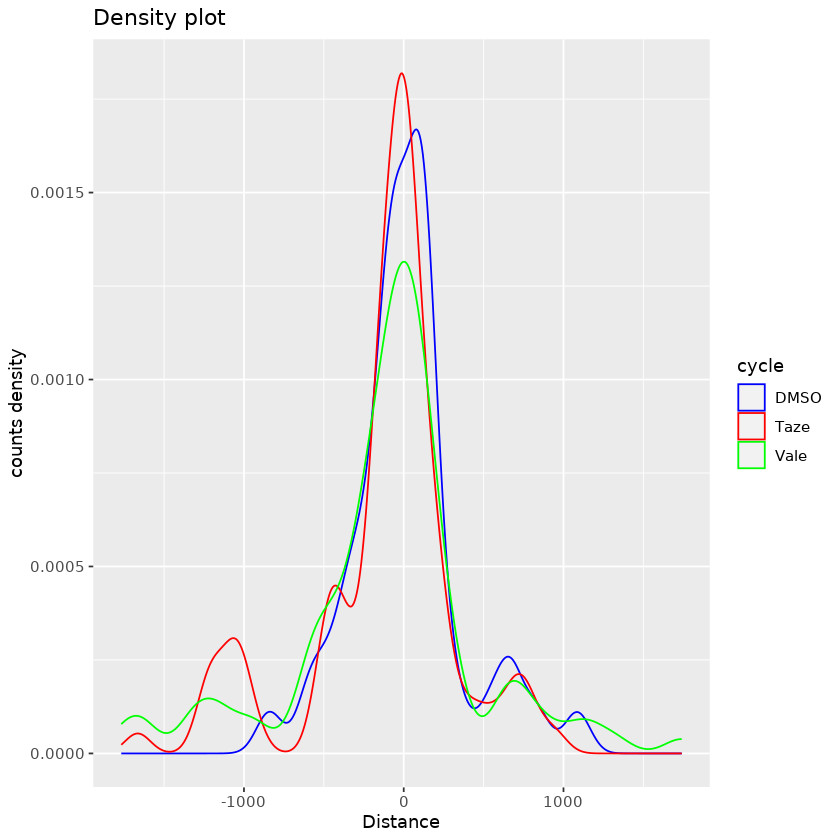

In [38]:
#taze_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Taze","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
#vale_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Vale","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
mat=matrix(ncol=3)
for(cycle in c("DMSO","Taze","Vale")){
    dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_",cycle,"/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

dmso <- GRanges(
  seqnames = dmso_poso$chr,
  ranges = IRanges(start = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2), end = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2)),
  signal = as.numeric(dmso_poso$abs_summit)
)
myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
toRemove=findOverlaps(myc,dmso)@to
igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
toRemove=append(toRemove,findOverlaps(igh,dmso)@to)
if(length(toRemove!=0)){
junctions_gr=dmso[-toRemove,]}else{junctions_gr=dmso}
#!!!!!!!!
cromosomi_comuni <- unique(seqnames(tss_gr))
junctions_gr <- junctions_gr[seqnames(junctions_gr) %in% cromosomi_comuni]
#!!!!!!!!!!


distance_GR=distanceToNearest(junctions_gr,tss_gr)
distance=start(junctions_gr[queryHits(distance_GR)])- start(tss_gr[subjectHits(distance_GR)])
distance=distance[which(abs(distance)<=2000)]
junctions_gr=junctions_gr[queryHits(distance_GR)][which(abs(distance)<=2000)]
mat=rbind(mat,cbind(distance,junctions_gr$signal,cycle))
}
mat=mat[-1,]
colnames(mat)=c("distance","counts","cycle")
mat=data.frame(mat)
# Carica il pacchetto ggplot2
library(ggplot2)

# Crea il plot di densità separato per ciascun ciclo con il colore delle linee
plot <- ggplot(mat, aes(x = as.numeric(distance), color = cycle)) +
  geom_density() +  # Plot di densità
  labs(x = "Distance", y = "counts density") +  # Etichette degli assi
  ggtitle("Density plot") +  # Titolo del plot
  scale_color_manual(values = c("DMSO" = "blue", "Taze" = "red", "Vale" = "green"))  # Specifica i colori

# Visualizza il plot
print(plot)

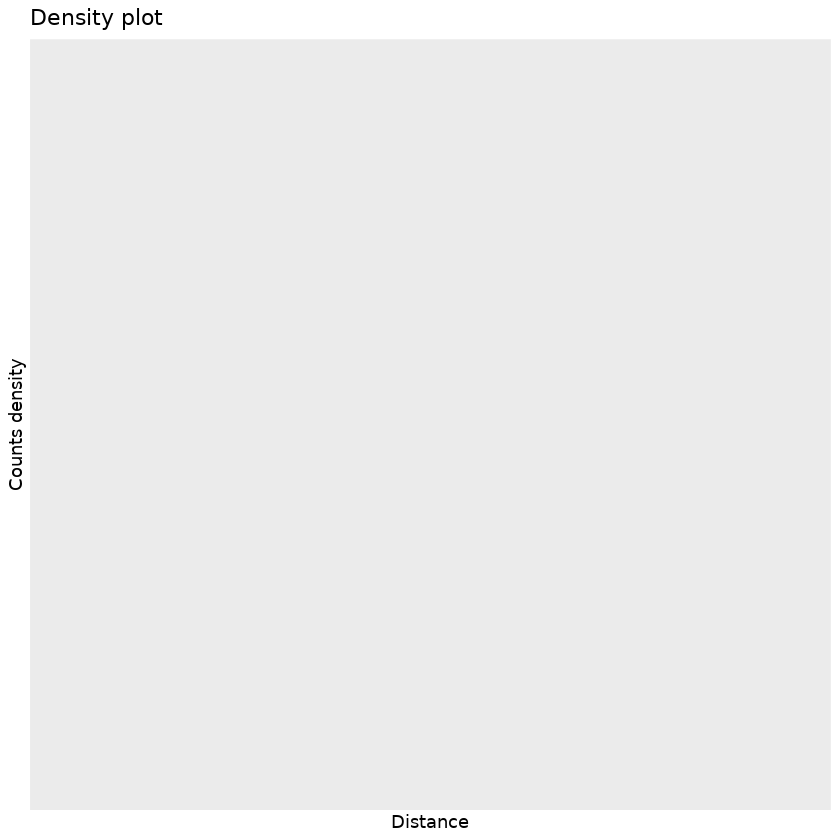

In [41]:
library(ggplot2)

# Crea un data frame vuoto con le colonne necessarie
empty_data <- data.frame(distance = numeric(0), cycle = character(0))

# Crea il grafico vuoto
plot <- ggplot(empty_data, aes(x = distance, color = cycle)) +
  labs(x = "Distance", y = "Counts density") +
  ggtitle("Density plot") +
  scale_color_manual(values = c("DMSO" = "blue", "Taze" = "red", "Vale" = "green"))

# Visualizza il grafico vuoto
print(plot)

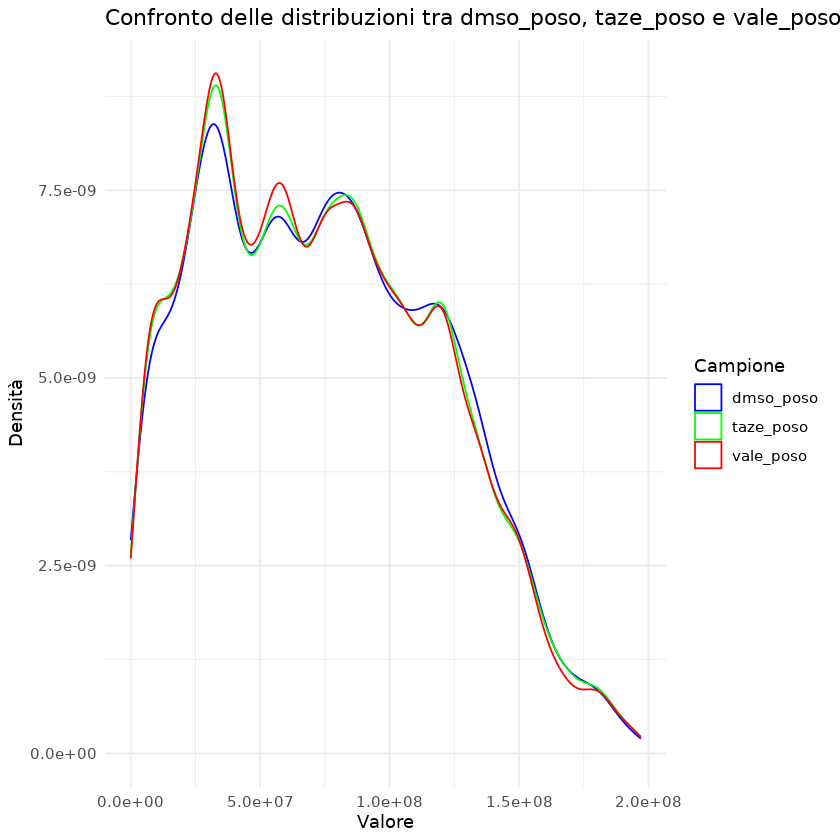

In [134]:
dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","DMSO","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

taze_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Taze","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
taze_poso=taze_poso[which(taze_poso$X.log10.qvalue.>mean(taze_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

vale_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_","Vale","/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
vale_poso=vale_poso[which(vale_poso$X.log10.qvalue.>mean(vale_poso$X.log10.qvalue.)),]$abs_summit  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE


df <- data.frame(Campione = c(rep("dmso_poso", length(dmso_poso)),
                              rep("taze_poso", length(taze_poso)),
                              rep("vale_poso", length(vale_poso))),
                 Valore = c(dmso_poso, taze_poso, vale_poso))
library(ggplot2)

# Crea un grafico a densità kernel
ggplot(df, aes(x = Valore, color = Campione)) +
  geom_density() +
  labs(title = "Confronto delle distribuzioni tra dmso_poso, taze_poso e vale_poso",
       x = "Valore", y = "Densità") +
  scale_color_manual(values = c("dmso_poso" = "blue", "taze_poso" = "green", "vale_poso" = "red")) +
  theme_minimal()


Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr1_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr1_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random
  - in 'y': chrY
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr13_random, chr17_random, chr1_random, chr3_random, chr4_random, chr8_random, chr9_random, chrM, chrUn_random, chrX_random
  - in 'y': chrY
  Make sure to always combine/compar

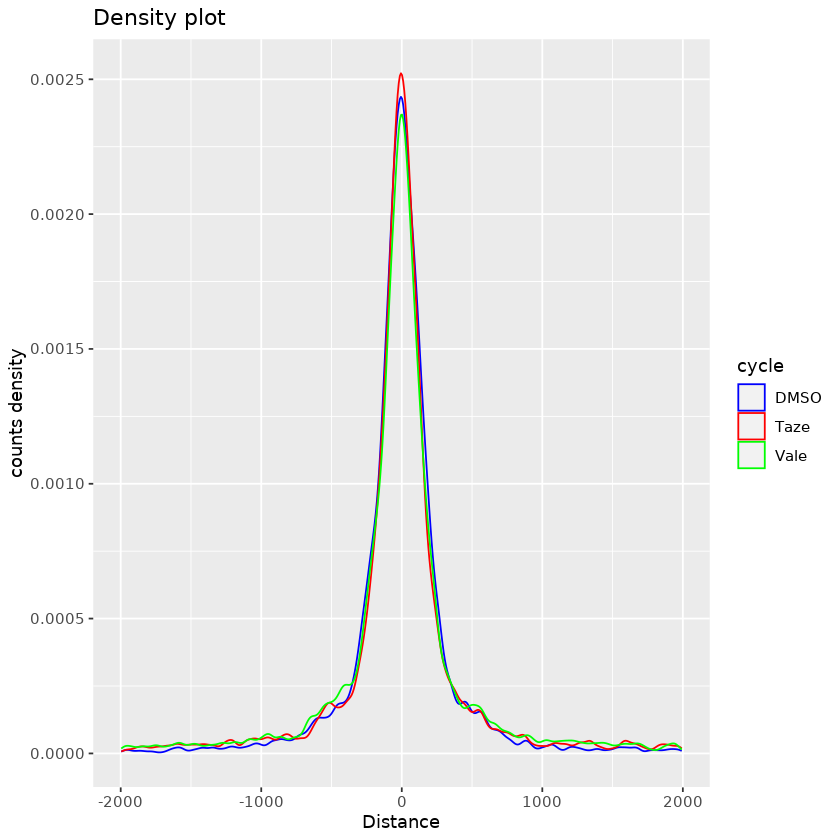

In [11]:
mat=matrix(ncol=3)
for(cycle in c("DMSO","Taze","Vale")){
    dmso_poso <- read.table(paste("/sharedFolder/Data/5_CutTagAce/MACS2_220607_JT10123_MN00260_trimmed_",cycle,"/macs2_peak_q0.1_peaks.csv",sep=""), header = TRUE, sep = ",")
dmso_poso=dmso_poso[which(dmso_poso$X.log10.qvalue.>mean(dmso_poso$X.log10.qvalue.)),]  #FILTRO PER LA MEDIA E PRENDO I MIGLIORI QVALUE

dmso <- GRanges(
  seqnames = dmso_poso$chr,
  ranges = IRanges(start = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2), end = as.numeric(abs(dmso_poso$end+dmso_poso$start)/2)),
  signal = as.numeric(dmso_poso$abs_summit/dmso_poso$length)
)
myc=GRanges(seqnames="chr15",ranges=IRanges(start=60562682,end=63076130))
toRemove=findOverlaps(myc,dmso)@to
igh=GRanges(seqnames="chr12",ranges=IRanges(start=114419999,end=114680000))
toRemove=append(toRemove,findOverlaps(igh,dmso)@to)
if(length(toRemove!=0)){
junctions_gr=dmso[-toRemove,]}else{junctions_gr=dmso}
#!!!!!!!!
cromosomi_comuni <- unique(seqnames(tss_gr))
junctions_gr <- junctions_gr[seqnames(junctions_gr) %in% cromosomi_comuni]
#!!!!!!!!!!


distance_GR=distanceToNearest(junctions_gr,tss_gr)
distance=start(junctions_gr[queryHits(distance_GR)])- start(tss_gr[subjectHits(distance_GR)])
distance=distance[which(abs(distance)<=2000)]
junctions_gr=junctions_gr[queryHits(distance_GR)][which(abs(distance)<=2000)]
mat=rbind(mat,cbind(distance,junctions_gr$signal,cycle))
}
mat=mat[-1,]
colnames(mat)=c("distance","counts","cycle")
mat=data.frame(mat)
# Carica il pacchetto ggplot2
library(ggplot2)

# Crea il plot di densità separato per ciascun ciclo con il colore delle linee
plot <- ggplot(mat, aes(x = as.numeric(distance), color = cycle)) +
  geom_density() +  # Plot di densità
  labs(x = "Distance", y = "counts density") +  # Etichette degli assi
  ggtitle("Density plot") +  # Titolo del plot
  scale_color_manual(values = c("DMSO" = "blue", "Taze" = "red", "Vale" = "green"))  # Specifica i colori

# Visualizza il plot
print(plot)

In [9]:
dmso_poso

,chr,start,end,length,abs_summit,pileup,X.log10.pvalue.,fold_enrichment,X.log10.qvalue.,name
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
8,chr1,4775547,4776079,533,4775727,18,17.11660,9.26920,12.96320,macs2_peak_q0.1_peak_8
9,chr1,4797579,4797880,302,4797710,17,13.97450,7.63521,10.18260,macs2_peak_q0.1_peak_9
11,chr1,4847520,4848127,608,4847729,29,20.70970,8.15483,16.17350,macs2_peak_q0.1_peak_11
13,chr1,4904492,4904795,304,4904618,15,11.41880,6.58463,7.94473,macs2_peak_q0.1_peak_13
15,chr1,5073222,5073534,313,5073296,9,8.27035,5.81422,5.23789,macs2_peak_q0.1_peak_15
18,chr1,5223027,5223306,280,5223207,10,8.71133,5.94370,5.61324,macs2_peak_q0.1_peak_18
21,chr1,6204313,6204935,623,6204622,22,14.43680,6.64433,10.59010,macs2_peak_q0.1_peak_21
22,chr1,6205118,6205470,353,6205266,19,11.69080,5.83873,8.18154,macs2_peak_q0.1_peak_22
24,chr1,6253155,6253446,292,6253278,12,11.93940,7.55848,8.39685,macs2_peak_q0.1_peak_24
